## README TEXT
The crawled data is split into two files: "crawl1.txt" and "crawl2.txt" contain data from the Crawl1 and Crawl2 respectively, as described in the paper. The Crawl 2 data is smaller because it only covers the first two pages of seller per product, versus Crawl 1 which covers all pages. However, Crawl 2 includes data from the Buy Box, while Crawl 1 does not.

Every row in the data corresponds to an offer by a seller for a given product at a given epoch from the "New Offers" page for said product at said epoch.

The two files contain the following tab separated columns from left-to-right. Data from Crawl1 spans columns 1 to 14 (both inclusive); data from Crawl2 includes all columns.

COLUMN  DESCRIPTION
1       pid - (string) The unique product id (or ASIN) that Amazon assigns to each product.
2       epoc -(integer) The timestamp at which this sample was collected.
3       sid - (string) The unique seller id that Amazon assigns to each seller. Note that if the seller is Amazon, the seller id has been saved as "amazon".
4       price - (float) The item price listed by a seller. Note that the item price cannot be 0 for any item. For samples where the item price was unavailable (due to an error in downloading the page, scraping the data or because the price will only be displayed after adding the item to the cart), the item price has been saved as "0". Users are advised to ignore these (price==0) data points when running experiments involving item price.
5       sid_rating - (float) The "star" rating of a seller ranging from 0 to 5 (both inclusive).
6       sid_pos_fb - (integer) The positive feedback score of a seller ranging from 0 to 100 (both inclusive).
7       sid_rating_cnt - (integer) The number of ratings received by a seller.
8       shipping - (float) The shipping price listed by a seller. Note that the shipping price can be 0. For samples where shipping price was unavailable (due to an error in downloading the page, scraping the data or because the price will only be displayed after adding the item to the cart), the shipping price has been saved as "-1" . Users are advised to ignore these (price==-1) data points when running experiments involving shipping price.
9       page - (integer) The page number at which a seller was listed. Minimum page number is "1".
10      rank - (integer) The rank of a seller on the page it was listed. Minimum rank is "0".
11      pid_rating - (float) The "star" rating of a product ranging from 0 to 5 (both inclusive). For samples where the rating was unavailable, the rating has been saved as "nan".
12      pid_rating_cnt - (integer) The number of ratings received by a product. For samples where the number of ratings was unavailable, the number of ratings has been saved as "nan".
13      is_fba - (bool) Is this offer listing Fulfilled By Amazon? <yes/no>.
14      is_prime - (bool) Does the seller offer Prime shipping for this listing? <yes/no>.
15      bbox_sid - (string) The seller selected by Amazon as the default (BuyBox) seller for the product.
16      bbox_price - (float) The price by the BuyBox seller on the product page for a product.

Two additional files "prime_sids.txt.all" and "susp_sids_all_with_amazon.txt" contain the list of prime sellers and algorithmic sellers respectively.



## NOTES


In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [ ]:
crawl1 = pd.read_csv("crawl1.txt")

In [36]:
crawl2 = pd.read_table("crawl2.txt")

In [18]:
prime_sids = pd.read_table("prime_sids.txt", header=None, names=["prime_sids"])
algo_sellers = pd.read_table("susp_sids_all_with_amazon.txt", header=None, names=["algo_sids"])

In [38]:
crawl2.columns = ["pid", "epoc", "sid", "price", "sid_rating", "sid_pos_fb", "sid_rating_cnt", "shipping", "page", "rank", "pid_rating", "pid_rating_cnt", "is_fba", "is_prime", "bbox_sid", "bbox_price"]
crawl2["prime_seller"] = crawl2["sid"].isin(prime_sids["prime_sids"])
crawl2["algo_seller"] = crawl2["sid"].isin(algo_sellers["algo_sids"])

In [20]:
unique_pids = crawl2["pid"].unique().tolist()
unique_pids

['0975277324',
 'B00000J0RJ',
 'B00000JBNX',
 'B00002ND64',
 'B00004R9TL',
 'B00004RBDU',
 'B00004RIZ7',
 'B00004S7V8',
 'B00004SQLJ',
 'B00004TZY8',
 'B00004U9JO',
 'B00004UBGZ',
 'B00004UE29',
 'B00004YO15',
 'B00004YTJE',
 'B00004Z4A8',
 'B00004Z4CP',
 'B00004Z5SM',
 'B000052XHI',
 'B00005BXKM',
 'B00005O6B7',
 'B000067EH7',
 'B000067PCE',
 'B000067PQ0',
 'B000068O36',
 'B000068O3C',
 'B000068PBT',
 'B00006ANDK',
 'B00006I551',
 'B00006IBYA',
 'B00006IDV8',
 'B00006IEE4',
 'B00006IEEU',
 'B00006IEJC',
 'B00006IESK',
 'B00006IFAV',
 'B00006IFH0',
 'B00006IFKU',
 'B00006IUWA',
 'B00006JNN7',
 'B00006WNMJ',
 'B00008Y0VN',
 'B000096QQ5',
 'B00009IMCK',
 'B00009PGNT',
 'B0000AQOH2',
 'B0000AXRH5',
 'B0000CBK1L',
 'B0000YNR4M',
 'B0000YUXI0',
 'B00012YIA0',
 'B00016XJ4M',
 'B000197NXM',
 'B0001DSIVY',
 'B0001J3R3C',
 'B00026ZEDK',
 'B00028XJNA',
 'B00029WYEY',
 'B0002CZW0Y',
 'B0002D0CA8',
 'B0002D0CAI',
 'B0002D0HXA',
 'B0002E1G5C',
 'B0002E1P08',
 'B0002E7DIQ',
 'B0002FOBJY',
 'B0002GLC

In [21]:
algoonly = crawl2[crawl2[]]
pidsandcount = crawl2.groupby("pid").agg({"pid" : "count"})
pidsandcount.columns = ["count"]
pidsandcount = pidsandcount.reset_index().sort_values(by="count", ascending=False)
pidsandcount.head(30)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (586462686.py, line 1)

In [35]:
product = crawl2
product

,pid,epoc,sid,price,sid_rating,sid_pos_fb,sid_rating_cnt,shipping,page,rank,pid_rating,pid_rating_cnt,is_fba,is_prime,bbox_sid,bbox_price,prime_seller,algo_seller,date
0,0975277324,1439301853,A19HZ7QWHIRFQA,35.0,0.0,0,0,6.49,1,7,5.0,2321,yes,no,amazon,40.36,False,False,2015-08-11 14:04:13
20,0975277324,1439303705,A19HZ7QWHIRFQA,35.0,0.0,0,0,6.49,1,7,5.0,2322,yes,no,amazon,40.36,False,False,2015-08-11 14:35:05
40,0975277324,1439305529,A19HZ7QWHIRFQA,35.0,0.0,0,0,6.49,1,7,5.0,2322,yes,no,amazon,40.36,False,False,2015-08-11 15:05:29
60,0975277324,1439307283,A19HZ7QWHIRFQA,35.0,0.0,0,0,6.49,1,8,5.0,2323,yes,no,amazon,37.64,False,False,2015-08-11 15:34:43
80,0975277324,1439310861,A19HZ7QWHIRFQA,35.0,0.0,0,0,6.49,1,8,5.0,2324,yes,no,amazon,37.64,False,False,2015-08-11 16:34:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12202,0975277324,1440363670,A19HZ7QWHIRFQA,35.0,0.0,0,0,6.49,1,4,5.0,2356,yes,no,amazon,39.28,False,False,2015-08-23 21:01:10
12222,0975277324,1440365209,A19HZ7QWHIRFQA,35.0,0.0,0,0,6.49,1,3,5.0,2356,yes,no,amazon,39.28,False,False,2015-08-23 21:26:49
12242,0975277324,1440366740,A19HZ7QWHIRFQA,35.0,0.0,0,0,6.49,1,4,5.0,2356,yes,no,amazon,39.28,False,False,2015-08-23 21:52:20
12262,0975277324,1440368289,A19HZ7QWHIRFQA,35.0,0.0,0,0,6.49,1,4,5.0,2356,yes,no,amazon,39.28,False,False,2015-08-23 22:18:09


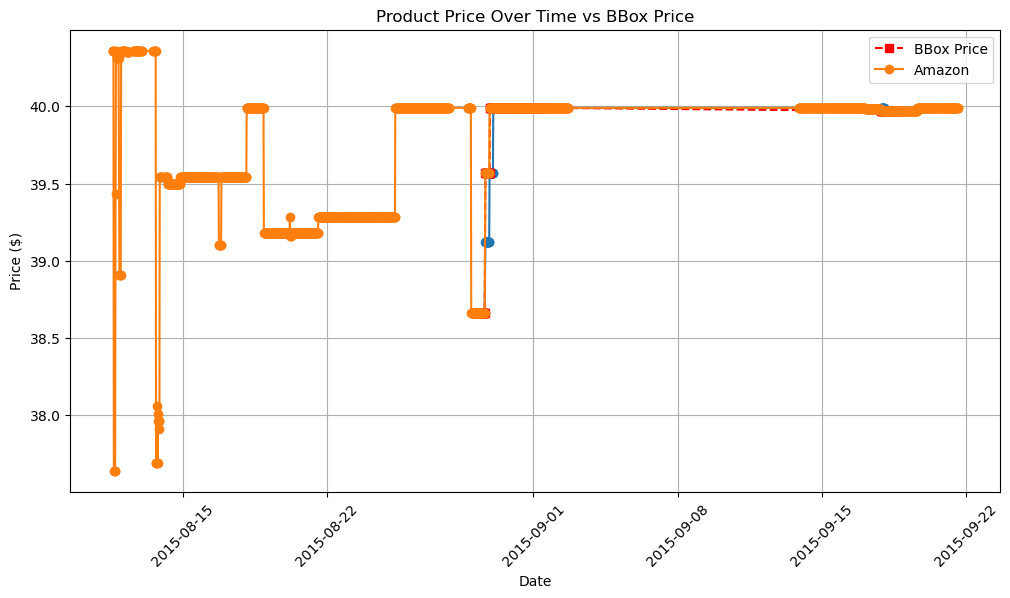

,pid,epoc,sid,price,sid_rating,sid_pos_fb,sid_rating_cnt,shipping,page,rank,pid_rating,pid_rating_cnt,is_fba,is_prime,bbox_sid,bbox_price,prime_seller,algo_seller,date
0,0975277324,1439301853,A19HZ7QWHIRFQA,35.00,0.0,0,0,6.49,1,7,5.0,2321,yes,no,amazon,40.36,False,False,2015-08-11 14:04:13
9,0975277324,1439301853,A2P5I4NW0QQAX1,41.95,5.0,100,321754,0.00,1,8,5.0,2321,yes,yes,amazon,40.36,True,True,2015-08-11 14:04:13
12,0975277324,1439301853,A37NB9LWSJIWYW,44.12,5.0,96,8889,0.00,2,3,5.0,2321,no,no,amazon,40.36,False,False,2015-08-11 14:04:13
6,0975277324,1439301853,A21RXWYDVCOQD3,47.44,5.0,98,46893,0.00,2,6,5.0,2321,no,no,amazon,40.36,True,False,2015-08-11 14:04:13
3,0975277324,1439301853,A1OUQ84L1EU4IB,36.99,5.0,100,2,6.49,2,1,5.0,2321,no,no,amazon,40.36,False,False,2015-08-11 14:04:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29816,0975277324,1442846263,ALCNZSFPRCN0H,41.79,5.0,97,41623,0.00,1,4,5.0,2393,yes,no,amazon,39.99,False,False,2015-09-21 14:37:43
29817,0975277324,1442846263,amazon,39.99,5.0,100,4194304,0.00,1,0,5.0,2393,yes,yes,amazon,39.99,True,True,2015-09-21 14:37:43
29818,0975277324,1442846263,ATE47T0DFWFQX,44.12,4.5,88,67,0.00,2,0,5.0,2393,yes,no,amazon,39.99,False,False,2015-09-21 14:37:43
29799,0975277324,1442846263,A15JJW6SG5GRME,39.99,5.0,98,74736,0.00,1,2,5.0,2393,yes,yes,amazon,39.99,True,False,2015-09-21 14:37:43


In [54]:
crawl2["date"] = pd.to_datetime(crawl2["epoc"], unit="s")

pid_sid_dict = crawl2.groupby("pid")["sid"].apply(list).to_dict()
pid_filtered_crawl2 = crawl2[crawl2["pid"]== "0975277324"]
amazon = pid_filtered_crawl2[pid_filtered_crawl2["sid"]== "amazon"]
# Sort values by date for better visualization
crawl2 = crawl2.sort_values(by="date")

# Plotting
plt.figure(figsize=(12, 6))
counter = 0
pid_filtered_crawl2
for sid, sid_df in pid_filtered_crawl2.groupby("sid"):
        plt.plot(sid_df["date"], sid_df["price"], marker="o", linestyle="-")
        counter+=1
        if counter == 1:
                plt.plot(sid_df["date"], sid_df["bbox_price"], label="BBox Price", marker="s", linestyle="--", color="red")
                plt.plot(amazon["date"], amazon["price"], marker="o", linestyle="-", label="Amazon")
                break


# Labels and title
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Product Price Over Time vs BBox Price")
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
pid_filtered_crawl2